## Лабораторна робота 4. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ";")

In [3]:
df.shape

(41188, 21)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [8]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [9]:
def targetVariableEncode(df: pd.DataFrame, columnName: str):
    df[columnName] = df[columnName].factorize()[0]
    return df[columnName]

bank_target = targetVariableEncode(df, 'y')


In [10]:
df['y'].unique()

array([0, 1], dtype=int64)

In [11]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [12]:
bank_client = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]

In [13]:
bank_client.head(15)

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
5,45,services,married,basic.9y,unknown,no,no
6,59,admin.,married,professional.course,no,no,no
7,41,blue-collar,married,unknown,unknown,no,no
8,24,technician,single,professional.course,no,yes,no
9,25,services,single,high.school,no,yes,no


In [14]:
def uniqueValuesCheck(df: pd.DataFrame):
    for col in df:
          print(col,sorted(bank_client[col].unique()))
            
bank_client_list = uniqueValuesCheck(bank_client)


age [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 95, 98]
job ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']
marital ['divorced', 'married', 'single', 'unknown']
education ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']
default ['no', 'unknown', 'yes']
housing ['no', 'unknown', 'yes']
loan ['no', 'unknown', 'yes']


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

In [15]:
def displayMaxAndMin(df: pd.DataFrame):
    print(f"Min value of attribute: {df['age'].min()}")
    print(f"Max value of attribute: {df['age'].max()}")
    
dataframe_values = displayMaxAndMin(df)   

Min value of attribute: 17
Max value of attribute: 98


In [16]:
bank_client.age.isna().sum()

0

<AxesSubplot:xlabel='age', ylabel='count'>

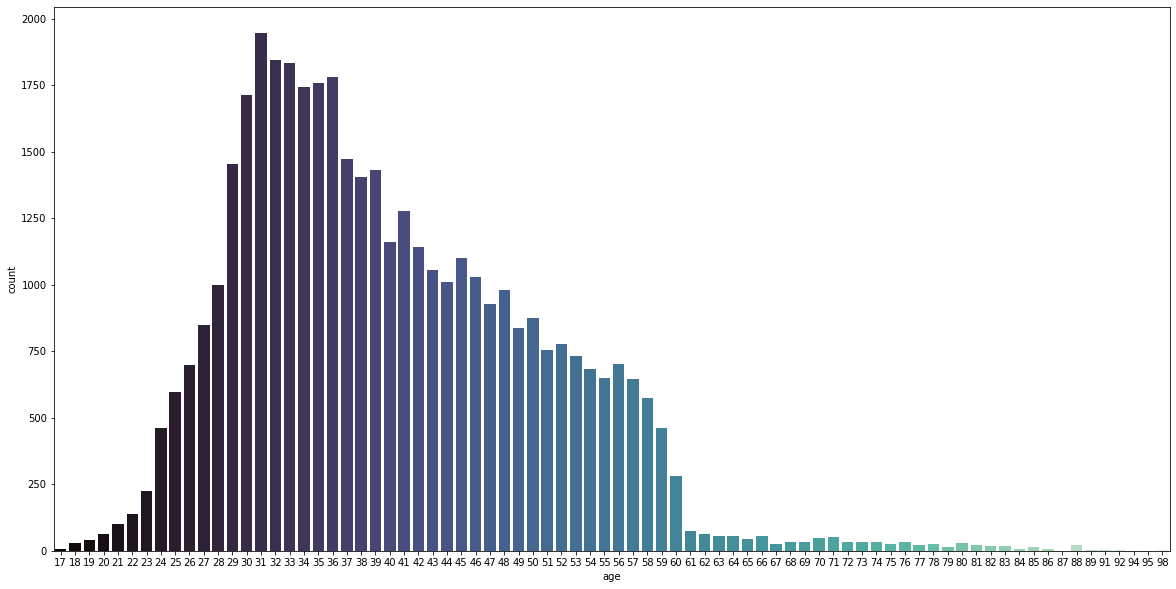

In [17]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(bank_client.age, palette="mako")

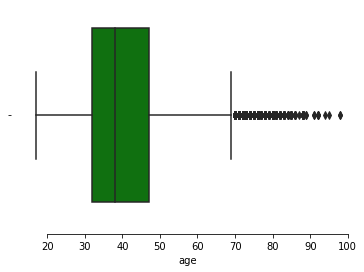

In [18]:
sns.boxplot(x = bank_client['age'], 
            hue = bank_client['age'], palette=["g"],
            data = bank_client )
sns.despine(offset=10, trim=True)

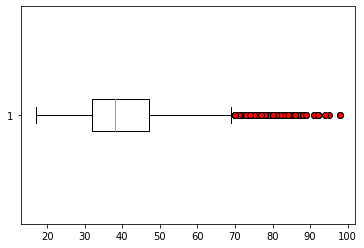

In [19]:
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x = bank_client['age'], vert = False, flierprops=red_circle);

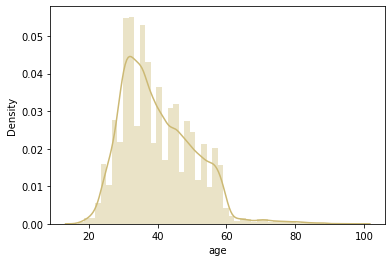

In [20]:
sns.set_color_codes()
ax = sns.distplot(bank_client['age'], color="y")

In [21]:
print("Age Skew:", bank_client.age.skew())

Age Skew: 0.7846968157646645


**Висновки з 1-4 завдання (детальні)**

 1.Данный dataset состоит из 21 атрибута(features).Размерность выборки 41188 x 21. 5 атрибутов типа int64,11 атрибутов типа object(строка, все такие атрибуты относятся к категориальному типу, это можно заметить при детальном изучение датафрейма),  5 атрибутов типа float64.Проверил выборку на отсутствие пропущенных значений с помощью метода isna() => пропусков нет.Смотря на статистические данные который вернуд метод describe() сразу можно заметить что минимальный возраст клиента банка  = 17 лет, самый взрослый клиент возрастом 98лет.

2.Найти target-переменную не было проблемой ибо в описании выборки написанно Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: "yes","no"). Данная переменная была категориальной принимала значения yes или no.Перекодировал её в численый тип с помощью удобного встроеного метода pandas factorize().В итоге получил значения 0 и 1.
 
3.Выделил в отдельный датасет такой список атрибутов: 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',которые непосредственно характеризуют клиентов банка, их возраст, професию, есть ли кредит или нет, семейный статус, образование, наличие жилищного кредита, наличие персонального займа.Также проверил все атрибуты данного датасета на уникальные значения.Для этого написал собственную функцию uniqueValuesCheck которая выводит массив уникальных значений по всем нужным атрибутам.
  
4.Как было сказано раньше, минимальный возраст клиента банка = 17 лет максимальный возраст =  89 лет. Проверил на Nan значения. Построив графики: countplot, boxplot, distplot, можно увидеть что переменная Age имеет тяжелый правый хвост, распределение близко к нормальному.Коэффициент скошености = 0.78.На countplot отчётливо видно насколько много outlires находятся в правой части графика.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [22]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5*IQR
    up_lim = Q3 + 1.5*IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers

In [23]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1.Функция detect_outliers_with_interquantile_range была создана для проверки на выбросы в атрибуте "age".Эта фунцкия по сути описывает все нужные компоненты и вычисляет их которые используются при построенние boxplot(ящик с усами).

2.Сначала высчитываются квартили Q1, Q2, Q3 которые являются : Q1 = первый квартиль(медиана верхней половины данных), Q2 = медиана, Q3 = третий квартиль(медиана нижней половины данных).Квартили делят данные  на 4 ровные части. Межквартильный размах или интерквартильный размах (IQR) высчитывается по простейшей формуле Q3 - Q1.Межквартильный размах дает еще одну меру изменчивости. Это лучшая мера дисперсии, чем диапазон, потому что она не учитывает крайние значения.  Нижние и верхние границы квартилей Q1 и Q3 высчитываются по следующим формулам: Q1 - 1,5*IQR и Q3 + 1,5*IQR.

3.Исходя из того что посчитала функция нижней границей стало значение -12.5 , верхней границей 95.5 .Остальные же зданные которые не попали в диапозон считаются выбросами и на последней строке мы можем увидеть двух клиентов банка и их характеристики.

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

<AxesSubplot:xlabel='job', ylabel='count'>

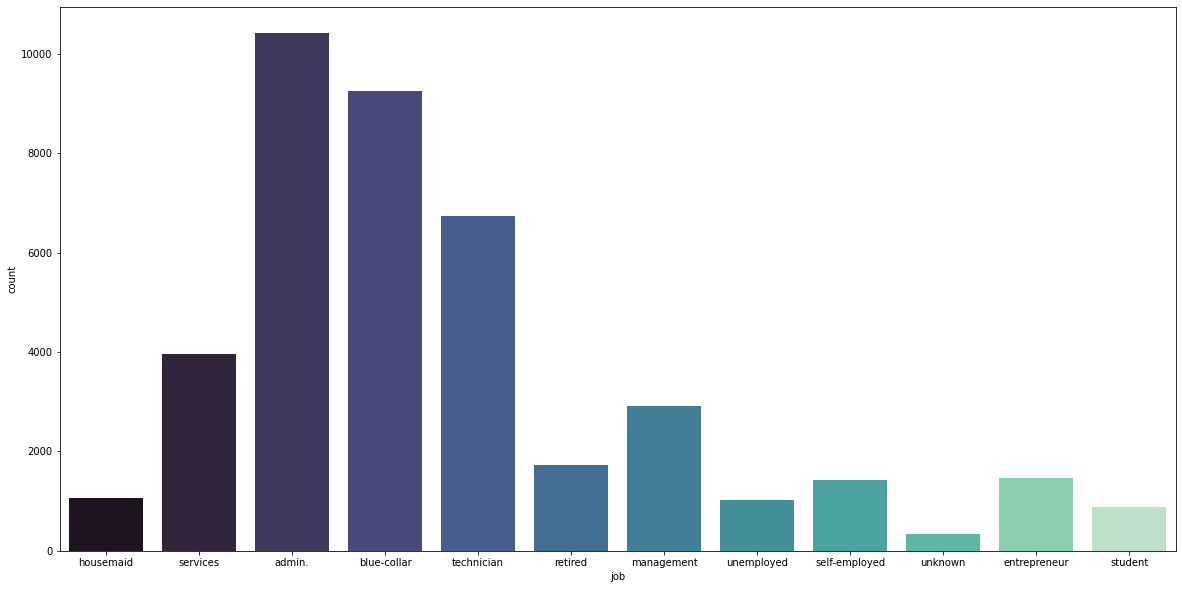

In [24]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(bank_client.job, palette="mako")

<AxesSubplot:xlabel='marital', ylabel='count'>

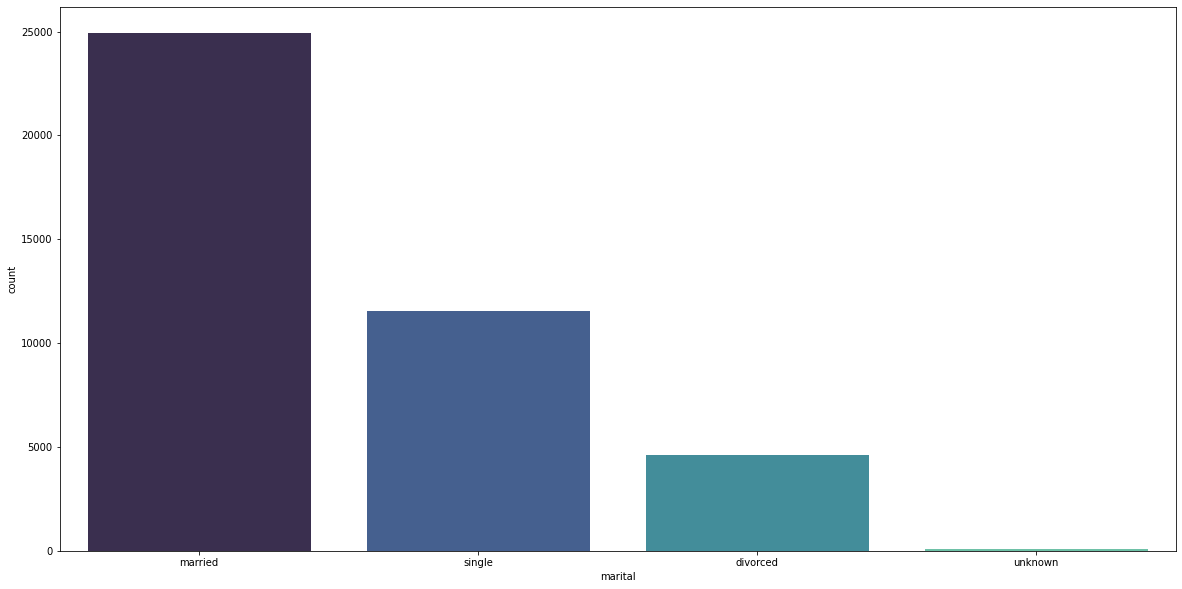

In [25]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(bank_client.marital, palette="mako")

<AxesSubplot:xlabel='education', ylabel='count'>

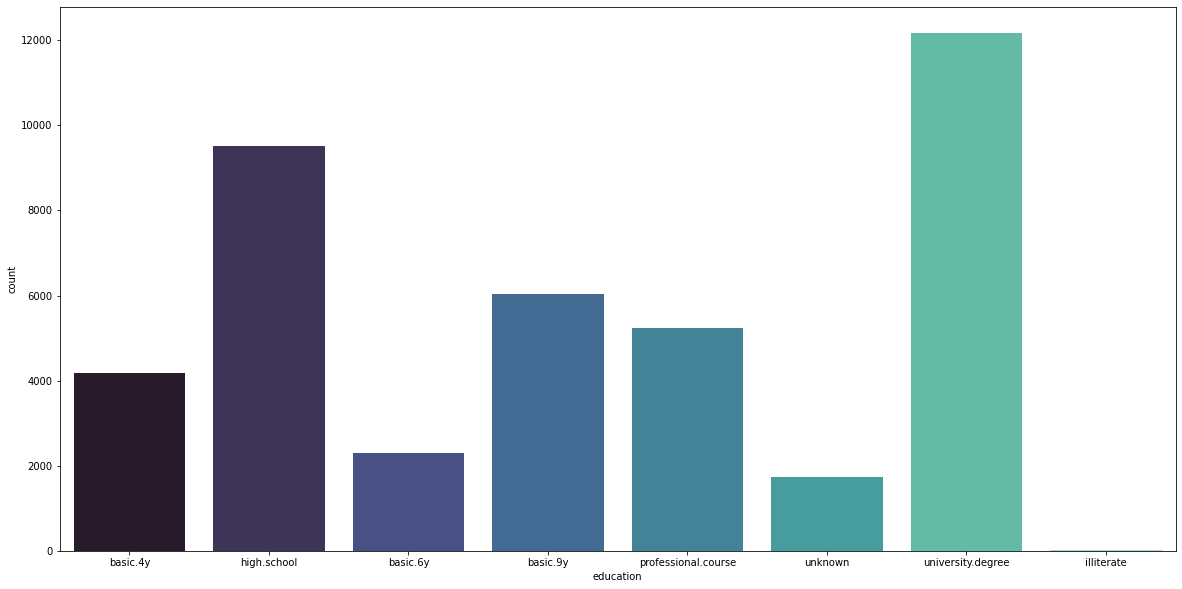

In [26]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(bank_client.education, palette="mako")

**Висновки з завдання 6 (детальні)**

1. На графике распределения касающийся профессии можно заметить что больше всего людей занимающие такие должности: admin, так званные синие воротнички - работники относящиеся к среднему классу и потом уже люди с технари. Людей которые на пенсии больше чем безработных.Очень малый процент людей относятся к типу неизвестный(unknown)
2. Второй график позволяет сделать следующие выводы:
<ul>
<li>Людей которые cостоят в браке больше всего</li>
<li>Одиноких людей визуально в два раза меньше нежели женатых</li>
<li>Людей которые в разводе ещё меньше</li>
<li>Людей по которым отсутствует данная информация по критерию marital почти что нет</li>
</ul>

3.Третий график явно говорит о том что очень большая часть людей с высшим образованием, потом идут люди у которых есть поное среднее образование(после школы).Количество людей которые закончили 9 классов и количество людей окончевших професиональные курсы почти равны между собой.Люди которые закончили 4 класса их больше чем людей которые закончили 6 классов.Людей без образования нет.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

<AxesSubplot:xlabel='default', ylabel='count'>

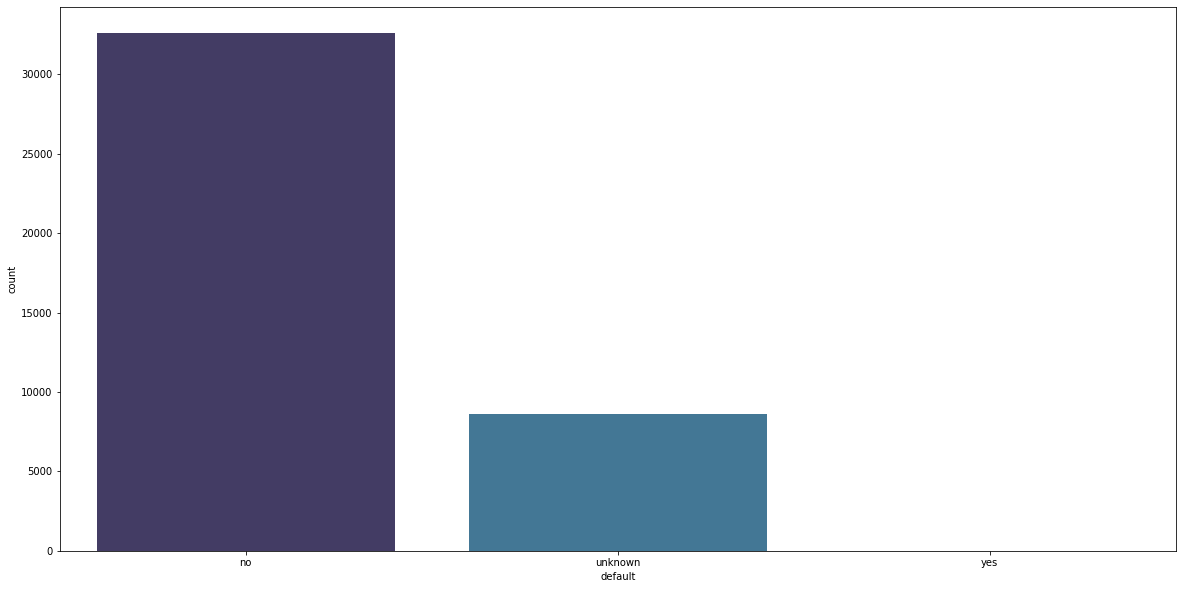

In [27]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(bank_client.default, palette="mako")

<AxesSubplot:xlabel='housing', ylabel='count'>

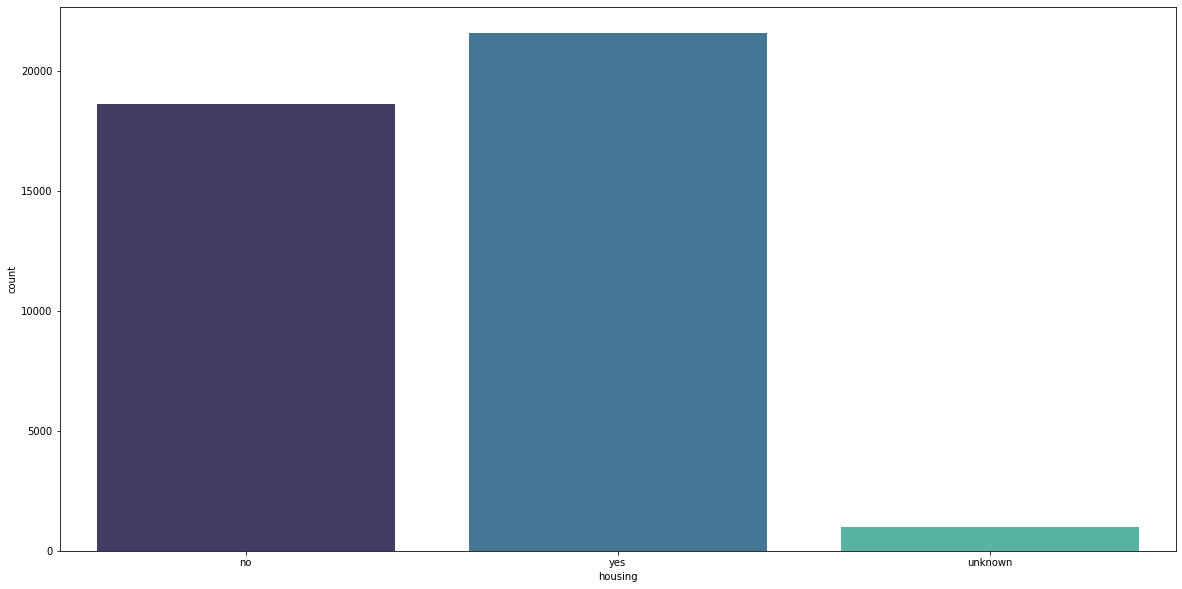

In [28]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(bank_client.housing, palette="mako")

<AxesSubplot:xlabel='loan', ylabel='count'>

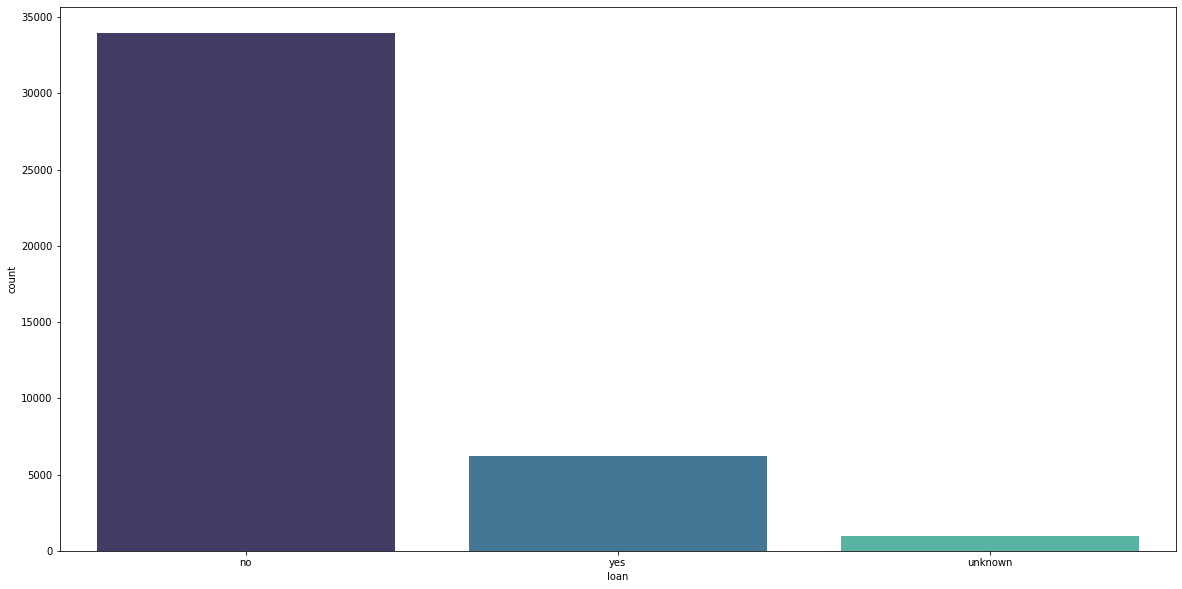

In [29]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(bank_client.loan, palette="mako")

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [30]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(not_null)
      
    return df

In [31]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [32]:
bank_client['age']

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64

In [33]:
def encode_q(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
    """
    Function for encoding age column
    
    df: pd.DataFrame to encode
    age_col: age col to encode
    """
    dataframe[age_col] = pd.qcut(dataframe[age_col], 4, range(4), duplicates = "drop")
    
    return dataframe

In [34]:
bank_client = encode_q(bank_client, 'age')

In [35]:
bank_client.head(15)

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,1,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2
5,2,7,1,2,1,0,0
6,3,0,1,5,0,0,0
7,2,1,1,7,1,0,0
8,0,9,2,5,0,2,0
9,0,7,2,3,0,2,0


<AxesSubplot:xlabel='age', ylabel='count'>

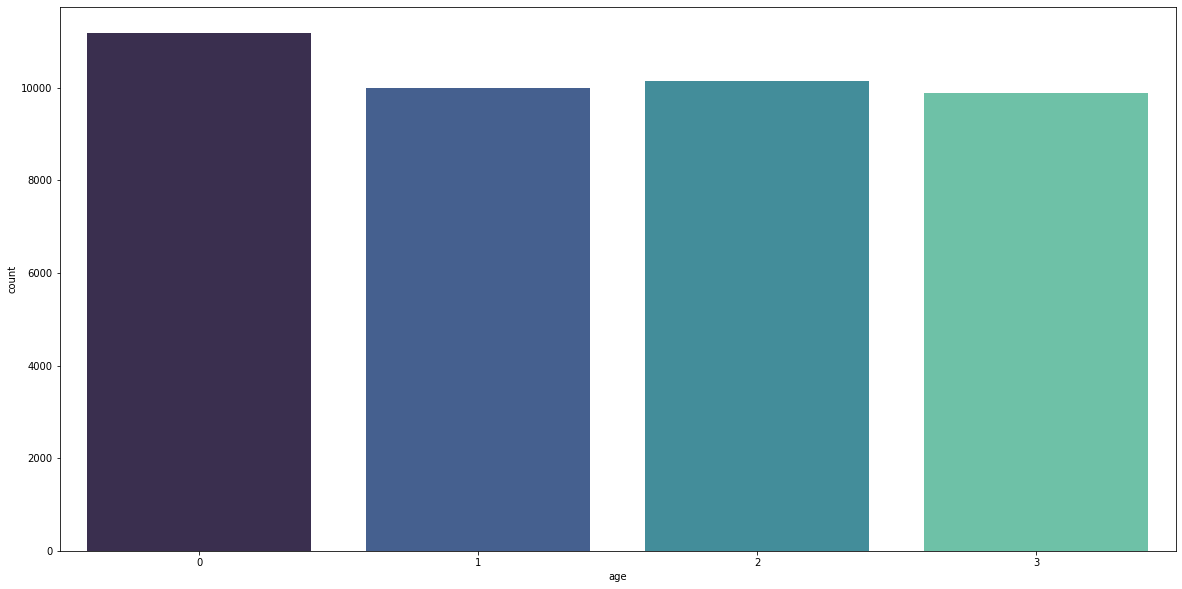

In [36]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(bank_client.age, palette="mako")

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

Для того чтобы трансформировать атрибут age в её квартильные значения , использовал метод pandas.qcut который делит данные исходя из значений которые мы поместим в labels.После трансформации , решил дополнительно построить график распределения для анализа, все груповые категории почти равны между собой по количеству людей.


## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [37]:
bank_relat = df[['contact', 'month', 'day_of_week', 'duration']]

In [38]:
bank_relat.head(15)

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307
5,telephone,may,mon,198
6,telephone,may,mon,139
7,telephone,may,mon,217
8,telephone,may,mon,380
9,telephone,may,mon,50


In [39]:
bank_relat.isna().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

In [40]:
bank_relat.isnull().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [41]:
def uniqueValues(df: pd.DataFrame):
    for col in df:
        print(f"{col} {sorted(df[col].unique())}")
        
uniqueValues(bank_relat[['contact','month', 'day_of_week']]);

contact ['cellular', 'telephone']
month ['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']
day_of_week ['fri', 'mon', 'thu', 'tue', 'wed']


In [42]:
bank_relat

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307
...,...,...,...,...
41183,cellular,nov,fri,334
41184,cellular,nov,fri,383
41185,cellular,nov,fri,189
41186,cellular,nov,fri,442


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



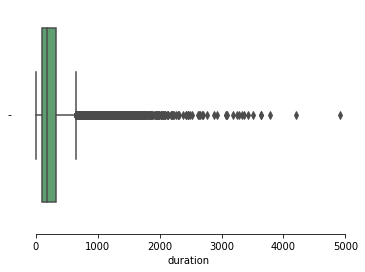

In [43]:
sns.boxplot(x = bank_relat['duration'], 
            hue = bank_relat['duration'], palette=["g"],
            data = bank_relat )
sns.despine(offset=10, trim=True)

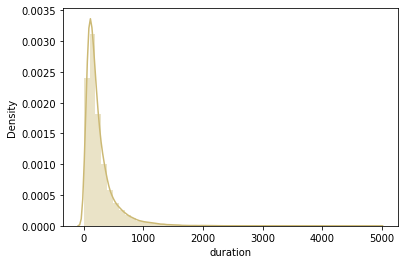

In [44]:
sns.set_color_codes()
ax = sns.distplot(bank_relat['duration'], color="y")

In [45]:
print("Duration Skew:", bank_relat.duration.skew())

Duration Skew: 3.263141255262832


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [46]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])

In [47]:
bank_relat.head(15)

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307
5,1,6,1,198
6,1,6,1,139
7,1,6,1,217
8,1,6,1,380
9,1,6,1,50


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [48]:
def encode_duration(df: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  
    """
  Function for encoding duration column
    
  df: pd.DataFrame to encode
  duration_col: duration col to encode 
  """
  
    df[duration_col] = pd.qcut(df[duration_col], 4, labels = range(4), duplicates = "drop")
    
    return df

In [49]:
bank_relat = encode_duration(bank_relat, 'duration')

In [50]:
bank_relat['duration']

0        2
1        1
2        2
3        1
4        2
        ..
41183    3
41184    3
41185    2
41186    3
41187    2
Name: duration, Length: 41188, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [51]:
bank_relat.head()

,contact,month,day_of_week,duration
0,1,6,1,2
1,1,6,1,1
2,1,6,1,2
3,1,6,1,1
4,1,6,1,2


## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [52]:
bank_socec = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [53]:
bank_socec.head(15)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
5,1.1,93.994,-36.4,4.857,5191.0
6,1.1,93.994,-36.4,4.857,5191.0
7,1.1,93.994,-36.4,4.857,5191.0
8,1.1,93.994,-36.4,4.857,5191.0
9,1.1,93.994,-36.4,4.857,5191.0


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [54]:
bank_other = df[['campaign', 'pdays', 'previous', 'poutcome']]

In [55]:
bank_other.head(15)

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent
5,1,999,0,nonexistent
6,1,999,0,nonexistent
7,1,999,0,nonexistent
8,1,999,0,nonexistent
9,1,999,0,nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [56]:
def poutcomeVariableEncode(df: pd.DataFrame, columnName: str):
    df[columnName] = df[columnName].factorize()[0]
    return df

poutcomeVariable = poutcomeVariableEncode(bank_other, 'poutcome')

In [57]:
bank_other['poutcome']

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    1
Name: poutcome, Length: 41188, dtype: int64

In [58]:
bank_other.head()

,campaign,pdays,previous,poutcome
0,1,999,0,0
1,1,999,0,0
2,1,999,0,0
3,1,999,0,0
4,1,999,0,0


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [59]:
bank_final= pd.concat([bank_client, bank_relat, bank_other],axis=1)

In [60]:
bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,3,3,1,0,0,0,0,1,6,1,2,1,999,0,0
1,3,7,1,3,1,0,0,1,6,1,1,1,999,0,0
2,1,7,1,3,0,2,0,1,6,1,2,1,999,0,0
3,2,0,1,1,0,0,0,1,6,1,1,1,999,0,0
4,3,7,1,3,0,0,2,1,6,1,2,1,999,0,0


**Завдання 19** Провести ділення вибірки

In [61]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state, shuffle=True)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [62]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, bank_target, 0.2, 10, 101)

In [63]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    return X_train, X_test

In [64]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [65]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7238   41]
 [ 797  162]]
90.0


## k-NN

k=1 85.80 (+/- 0.54)
k=2 88.75 (+/- 0.64)
k=3 88.23 (+/- 0.65)
k=4 89.15 (+/- 0.57)
k=5 89.11 (+/- 0.56)
k=6 89.49 (+/- 0.62)
k=7 89.40 (+/- 0.61)
k=8 89.68 (+/- 0.60)
k=9 89.71 (+/- 0.67)
k=10 89.87 (+/- 0.71)
k=11 89.77 (+/- 0.68)
k=12 89.91 (+/- 0.68)
k=13 89.90 (+/- 0.77)
k=14 89.96 (+/- 0.70)
k=15 89.96 (+/- 0.76)
k=16 89.96 (+/- 0.76)
k=17 90.00 (+/- 0.71)
k=18 89.97 (+/- 0.73)
k=19 89.95 (+/- 0.74)
k=20 89.98 (+/- 0.75)
k=21 90.01 (+/- 0.79)
k=22 90.00 (+/- 0.79)
k=23 90.02 (+/- 0.79)
k=24 90.02 (+/- 0.76)
k=25 90.04 (+/- 0.79)
The optimal number of neighbors is 24 with 90.0%


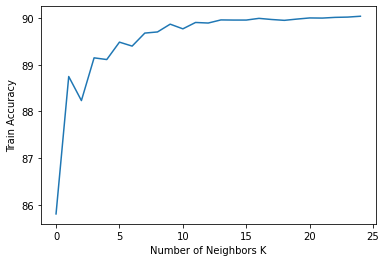

In [66]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [67]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7213   66]
 [ 775  184]]
90.0


## Логістична Регресія

In [68]:
models = pd.DataFrame({
                'Models': ['LOGCV', 'KNNCV'],
                'Score':  [LOGCV, KNNCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,LOGCV,0.899007
1,KNNCV,0.897065


**Висновки по моделям (детальні)**

1.Для того чтобы построить класификационную модель объеденил все заранее сформировавшиеся датафреймы в один датасет при этом проверил наличе всех нужных колонок для моделирования.Разделил с помощью функции prepare_data_for_training на train и test датасеты
2.Модель логистической регресии является по сути одним из подвидов линейной регресии.Результат данной модели вычесляется с помощью набора независимых переменных и  так званной дихотомической переменной , то есть с помощью переменой которая состоит из двух возможных вариантов(yes/no).Такой переменной в нашей выборке являлась bank_target. Также в данной работе был использован метод k-NN или k-ближайших соседей, который используется не только для решения класификационных задач, а и для регрессии в том числе. Метод относится к классу непараметрических, то есть не требует предположений о том, из какого статистического распределения была сформирована обучающее множество.Если уже говорить простыми словами то этот метод можно описать так: смотри на соседей вокруг какие из них преобладают, таковым ты и являешься.
3.Анализируя полученные результаты оценок (score) оба метода покахали довольно таки высокие цыфры ~90%.Но модель логистической регресии всё таки чуть лучше нежели метод ближайшего соседа, всё обусловлено с временем которое было потрачено на рассчёты , метод ближайшего соседа лично у меня считался около 10 минут.Также логистическая регрессия может получить уровень достоверности (о своем прогнозе), тогда как KNN может выводить только метки.